<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/Vector_RAG_vs_causal_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ All libraries installed
✓ Loaded 29 documents
  [0] Sam Altman founded Loopt in 2005, a location-based social ne...
  [1] Loopt raised $30 million in funding but struggled with user ...
  [2] Green Dot acquired Loopt for $43.4 million in 2012....
  [3] Loopt's failure taught Altman that utilities are inferior to...
  [4] Altman joined Y Combinator as a partner in 2011....
Initializing Vector RAG...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  - Encoding documents into vector space...
  ✓ Created 29 embeddings

✓ Vector RAG ready
Initializing Causal Graph RAG...
  ✓ Built DAG with 14 nodes, 13 edges

✓ Causal Graph RAG ready
Visualizing the full causal graph...



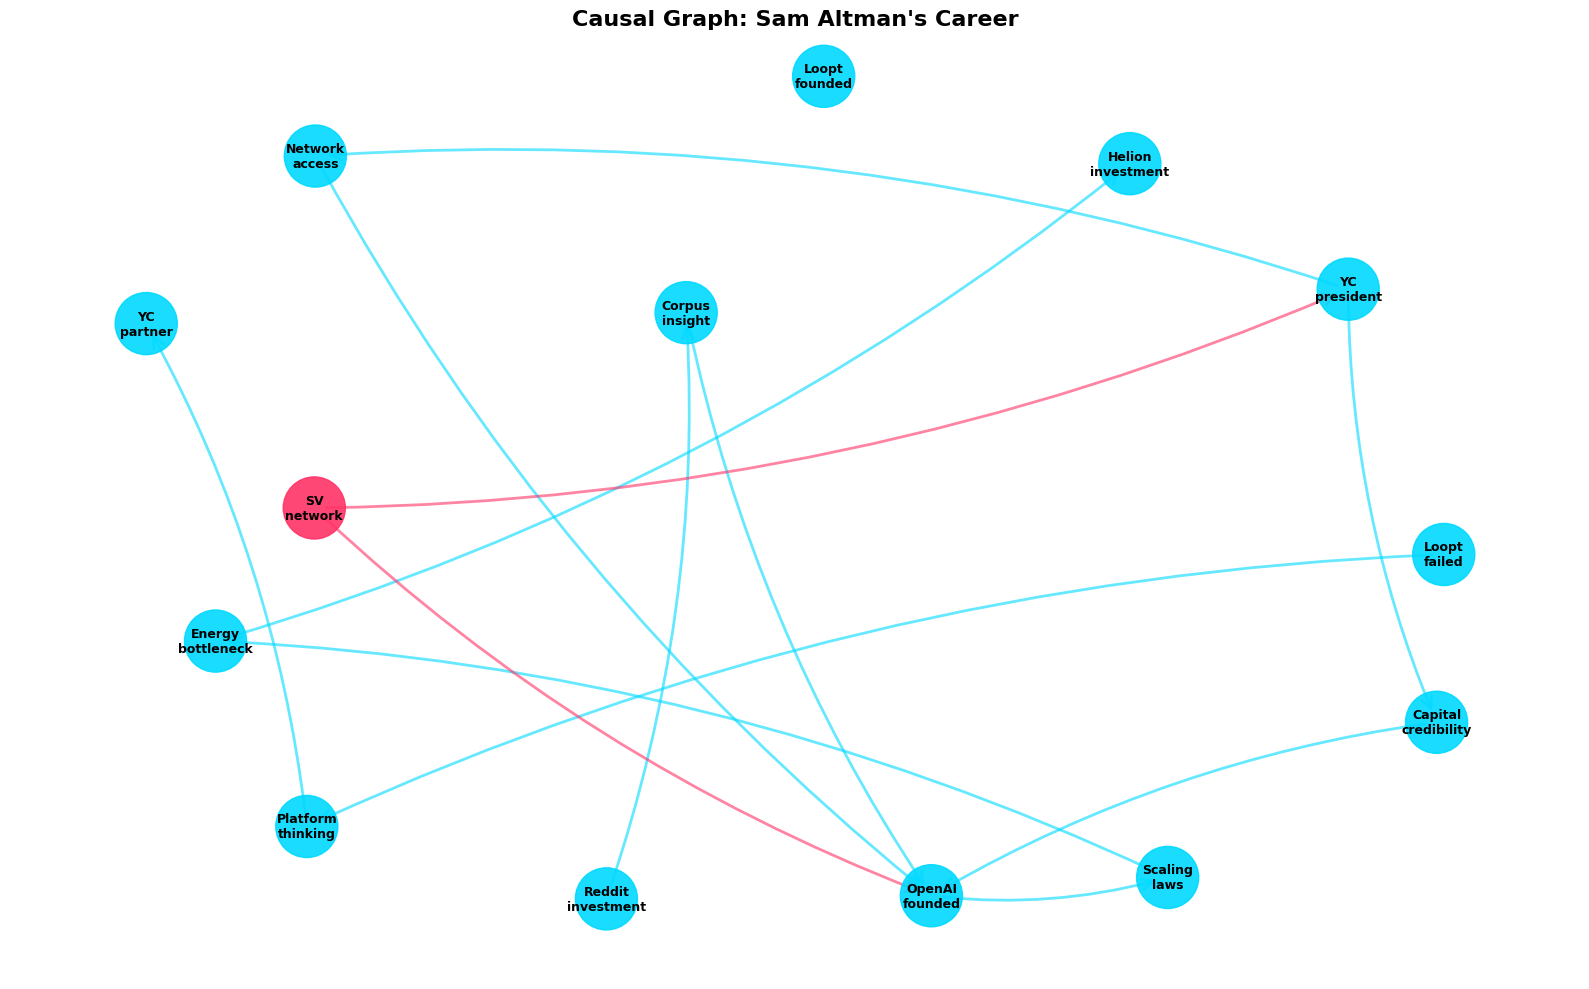


COMPARISON 1: Why did Sam invest in Helion?

VECTOR RAG ANSWER
Query: Why did Sam Altman invest in Helion Energy?

Retrieved documents (by similarity):
  1. [similarity: 0.815] Sam Altman invested $375 million in Helion Energy in 2021.
  2. [similarity: 0.578] Altman chairs Helion Energy as executive chairman.
  3. [similarity: 0.569] Altman led Reddit's $50 million Series B investment in 2014.

📊 What Vector RAG sees:
  - High cosine similarity between query and documents
  - Co-occurrence of terms in embedding space
  - Statistical association

❌ What Vector RAG CANNOT tell you:
  - WHY these events are connected
  - WHICH factors were necessary vs. coincidental
  - WHAT WOULD HAPPEN if one event didn't occur

CAUSAL GRAPH RAG ANSWER
Query: Why did Sam Altman invest in Helion Energy?

🎯 Causal Analysis: Helion Investment

Causal Chain:

  Path 1:
    OpenAI_founded
      → Research led to discovery of scaling laws
    Scaling_laws
      → Scaling laws predict energy becomes constrai

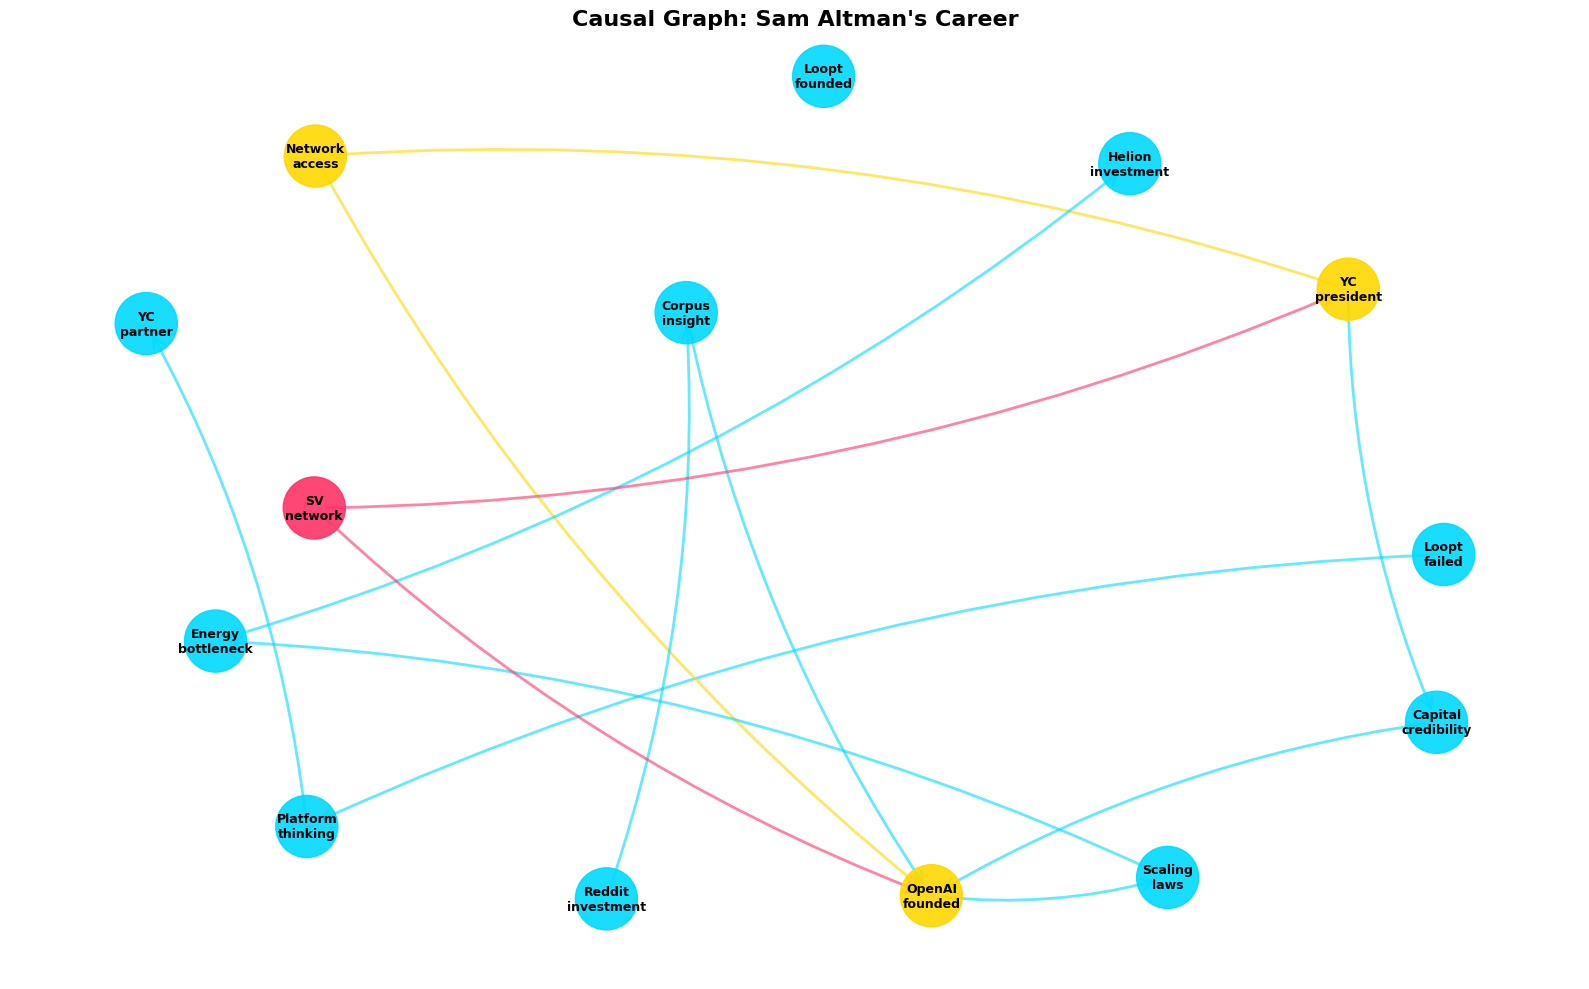


COUNTERFACTUAL REASONING

❓ Question: What if Sam had never joined Y Combinator?

Vector RAG: Cannot answer - no documents about this scenario exist

Causal Graph RAG:

  Step 1: Remove 'YC_president' node from graph
  Step 2: Check what becomes unreachable

  Nodes that become unreachable: ['Network_access', 'Capital_credibility']

  Conclusion:
    Without YC:
    - No network access → cannot recruit research team
    - No capital credibility → cannot raise initial funding
    - OpenAI either doesn't exist or exists in radically different form

  This is CAUSAL reasoning - understanding the mechanism,
  not just retrieving similar documents.

KEY INSIGHT SUMMARY

╔══════════════════════════════════════════════════════════════════════╗
║                    VECTOR RAG  vs.  CAUSAL GRAPH RAG                 ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  VECTOR RAG:                   

In [ ]:
# ============================================================================
# TOY DEMO: Vector RAG vs. Causal Graph RAG
# Interactive Google Colab Notebook
#
# This notebook demonstrates the fundamental difference between:
#   1. Vector RAG (correlation-based retrieval)
#   2. Causal Graph RAG (mechanism-based reasoning)
#
# Using Sam Altman's career as the test case.
#
# HOW TO USE:
#   - Copy each CELL into Google Colab
#   - Run cells top to bottom
#   - Try the interactive queries at the end
# ============================================================================


# ============================================================================
# CELL 1: Install Dependencies
# ============================================================================

!pip install networkx matplotlib numpy scikit-learn sentence-transformers -q

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries installed")


# ============================================================================
# CELL 2: Create Knowledge Base (Documents)
# ============================================================================

# Corpus: documents about Sam Altman's career
DOCUMENTS = [
    # Loopt
    "Sam Altman founded Loopt in 2005, a location-based social networking app.",
    "Loopt raised $30 million in funding but struggled with user adoption.",
    "Green Dot acquired Loopt for $43.4 million in 2012.",
    "Loopt's failure taught Altman that utilities are inferior to platforms.",

    # Y Combinator
    "Altman joined Y Combinator as a partner in 2011.",
    "In 2014, Sam Altman became president of Y Combinator.",
    "Y Combinator gave Altman access to a network of over 1,000 founders.",
    "Being YC president provided Altman with credibility among investors.",
    "Y Combinator's model reinforced Altman's platform-first thinking.",

    # Reddit
    "Altman led Reddit's $50 million Series B investment in 2014.",
    "Reddit provided insight into large-scale human text corpus data.",
    "Sam was one of Reddit's first dozen users since 2005.",

    # OpenAI
    "Sam Altman co-founded OpenAI in 2015 with Elon Musk and others.",
    "OpenAI initially raised $130 million as a nonprofit.",
    "Altman's network from YC helped recruit OpenAI's research team.",
    "Altman's investor credibility from YC enabled OpenAI's initial funding.",
    "Reddit's corpus insight influenced OpenAI's GPT training strategy.",

    # Scaling Laws
    "OpenAI discovered neural scaling laws around 2020.",
    "Scaling laws revealed that larger models have predictable improvements.",
    "GPT-4 training cost approximately $100 million.",
    "Scaling laws showed energy would become a bottleneck for AI.",

    # Helion
    "Sam Altman invested $375 million in Helion Energy in 2021.",
    "Helion is building nuclear fusion reactors for clean energy.",
    "Altman chairs Helion Energy as executive chairman.",
    "The investment addresses the energy bottleneck identified by scaling laws.",
    "Microsoft signed a deal to purchase power from Helion by 2028.",

    # General context
    "Silicon Valley has a strong network effect for tech founders.",
    "Successful founders often become investors in subsequent startups.",
    "Platform businesses create more value than utility applications.",
]

print(f"✓ Loaded {len(DOCUMENTS)} documents")
for i, doc in enumerate(DOCUMENTS[:5]):
    print(f"  [{i}] {doc[:60]}...")


# ============================================================================
# CELL 3: Build Vector RAG (Correlation-Based)
# ============================================================================

class VectorRAG:
    """Traditional vector-based retrieval system using embeddings."""

    def __init__(self, documents):
        print("Initializing Vector RAG...")
        self.documents = documents
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

        # Encode all documents
        print("  - Encoding documents into vector space...")
        self.doc_embeddings = self.model.encode(documents)
        print(f"  ✓ Created {len(self.doc_embeddings)} embeddings")

    def query(self, question, top_k=3):
        """Retrieve top-k most similar documents."""
        # Encode query
        query_embedding = self.model.encode([question])[0]

        # Compute cosine similarities
        similarities = cosine_similarity(
            [query_embedding],
            self.doc_embeddings
        )[0]

        # Get top-k
        top_indices = np.argsort(similarities)[::-1][:top_k]

        results = []
        for idx in top_indices:
            results.append({
                'doc': self.documents[idx],
                'similarity': similarities[idx],
                'index': idx
            })

        return results

    def answer(self, question):
        """Generate answer from retrieved documents."""
        results = self.query(question, top_k=3)

        print(f"\n{'='*70}")
        print(f"VECTOR RAG ANSWER")
        print(f"{'='*70}")
        print(f"Query: {question}\n")

        print("Retrieved documents (by similarity):")
        for i, r in enumerate(results, 1):
            print(f"  {i}. [similarity: {r['similarity']:.3f}] {r['doc']}")

        print("\n📊 What Vector RAG sees:")
        print("  - High cosine similarity between query and documents")
        print("  - Co-occurrence of terms in embedding space")
        print("  - Statistical association")

        print("\n❌ What Vector RAG CANNOT tell you:")
        print("  - WHY these events are connected")
        print("  - WHICH factors were necessary vs. coincidental")
        print("  - WHAT WOULD HAPPEN if one event didn't occur")

        return results

# Initialize Vector RAG
vector_rag = VectorRAG(DOCUMENTS)
print("\n✓ Vector RAG ready")


# ============================================================================
# CELL 4: Build Causal Graph RAG
# ============================================================================

class CausalGraphRAG:
    """Causal reasoning system using directed acyclic graphs."""

    def __init__(self):
        print("Initializing Causal Graph RAG...")
        self.graph = nx.DiGraph()
        self._build_causal_graph()
        print(f"  ✓ Built DAG with {self.graph.number_of_nodes()} nodes, {self.graph.number_of_edges()} edges")

    def _build_causal_graph(self):
        """Construct the causal DAG of Sam Altman's career."""

        # Add nodes (events/states)
        nodes = [
            'Loopt_founded',
            'Loopt_failed',
            'Platform_thinking',
            'YC_partner',
            'YC_president',
            'Network_access',
            'Capital_credibility',
            'Reddit_investment',
            'Corpus_insight',
            'OpenAI_founded',
            'Scaling_laws',
            'Energy_bottleneck',
            'Helion_investment',
            'SV_network'  # Confounder
        ]

        for node in nodes:
            self.graph.add_node(node)

        # Add causal edges with mechanisms
        edges = [
            # Loopt → Platform thinking
            ('Loopt_failed', 'Platform_thinking',
             'Failure taught that utilities < platforms'),

            # Platform thinking → YC strategy
            ('Platform_thinking', 'YC_partner',
             'Mindset attracted to platform-building organization'),

            # YC → Capabilities
            ('YC_president', 'Network_access',
             'Direct mechanism: YC gave access to 1000+ founders'),
            ('YC_president', 'Capital_credibility',
             'Direct mechanism: Proven track record with investors'),

            # Reddit → Insight
            ('Reddit_investment', 'Corpus_insight',
             'Exposure to large-scale human text data'),

            # Capabilities → OpenAI
            ('Network_access', 'OpenAI_founded',
             'Network enabled team recruitment (Greg Brockman, Ilya Sutskever)'),
            ('Capital_credibility', 'OpenAI_founded',
             'Credibility enabled $130M initial raise'),
            ('Corpus_insight', 'OpenAI_founded',
             'Insight shaped GPT training data strategy'),

            # OpenAI → Scaling → Energy
            ('OpenAI_founded', 'Scaling_laws',
             'Research led to discovery of scaling laws'),
            ('Scaling_laws', 'Energy_bottleneck',
             'Scaling laws predict energy becomes constraint'),
            ('Energy_bottleneck', 'Helion_investment',
             'Identified bottleneck drives vertical integration into energy'),

            # Confounder edges (SV Network affects both YC and OpenAI)
            ('SV_network', 'YC_president',
             'Silicon Valley ecosystem enables YC'),
            ('SV_network', 'OpenAI_founded',
             'Silicon Valley ecosystem enables OpenAI'),
        ]

        for src, dst, mechanism in edges:
            self.graph.add_edge(src, dst, mechanism=mechanism)

    def find_causal_paths(self, source, target):
        """Find all causal paths from source to target."""
        try:
            paths = list(nx.all_simple_paths(self.graph, source, target))
            return paths
        except (nx.NodeNotFound, nx.NetworkXNoPath):
            return []

    def explain_mechanism(self, source, target):
        """Explain the causal mechanism between two nodes."""
        if not self.graph.has_edge(source, target):
            return None
        return self.graph[source][target]['mechanism']

    def do_calculus(self, intervention, outcome):
        """
        Compute P(outcome | do(intervention)) - the causal effect.

        This simulates:
        1. Cutting all incoming edges to intervention node (removing confounders)
        2. Tracing causal effect forward to outcome
        """
        # Find all paths from intervention to outcome
        causal_paths = self.find_causal_paths(intervention, outcome)

        # Find confounders (nodes that point to both intervention and outcome)
        confounders = []
        for node in self.graph.nodes():
            if (self.graph.has_edge(node, intervention) and
                nx.has_path(self.graph, node, outcome)):
                confounders.append(node)

        return {
            'causal_paths': causal_paths,
            'confounders': confounders,
            'num_paths': len(causal_paths)
        }

    def answer(self, question):
        """Answer causal queries."""
        print(f"\n{'='*70}")
        print(f"CAUSAL GRAPH RAG ANSWER")
        print(f"{'='*70}")
        print(f"Query: {question}\n")

        # Parse question to identify relevant nodes
        # (In production, you'd use NLP here)
        if "helion" in question.lower() or "fusion" in question.lower():
            self._answer_helion()
        elif "openai" in question.lower() and "join" in question.lower():
            self._answer_openai_join()
        elif "yc" in question.lower() or "y combinator" in question.lower():
            self._answer_yc_effect()

    def _answer_helion(self):
        """Answer: Why did Sam invest in Helion?"""
        print("🎯 Causal Analysis: Helion Investment\n")

        # Find all paths to Helion
        paths_from_openai = self.find_causal_paths('OpenAI_founded', 'Helion_investment')

        print("Causal Chain:")
        for i, path in enumerate(paths_from_openai, 1):
            print(f"\n  Path {i}:")
            for j in range(len(path)-1):
                src, dst = path[j], path[j+1]
                mechanism = self.explain_mechanism(src, dst)
                print(f"    {src}")
                print(f"      → {mechanism}")
        print(f"    {paths_from_openai[0][-1]}")

        print("\n🔬 Mechanism Explanation:")
        print("  1. OpenAI research discovered scaling laws")
        print("  2. Scaling laws predict: larger models = better performance")
        print("  3. Larger models require exponentially more energy")
        print("  4. Energy becomes the binding constraint on AGI")
        print("  5. Therefore: invest in energy (Helion) to remove constraint")

        print("\n✅ This is CAUSAL understanding:")
        print("  - Each step is a mechanism, not a correlation")
        print("  - We can trace WHY, not just THAT")
        print("  - Counterfactual: No scaling laws → No energy bottleneck → No Helion")

    def _answer_openai_join(self):
        """Answer: Why did Sam join OpenAI?"""
        print("🎯 Causal Analysis: OpenAI Founding\n")

        # Find all inputs to OpenAI
        predecessors = list(self.graph.predecessors('OpenAI_founded'))

        print("Required Causal Inputs (all necessary):\n")
        for pred in predecessors:
            if pred == 'SV_network':  # Skip confounder for clarity
                continue
            mechanism = self.explain_mechanism(pred, 'OpenAI_founded')

            # Trace back further
            origin_paths = []
            for origin in ['YC_president', 'Reddit_investment']:
                if nx.has_path(self.graph, origin, pred):
                    origin_paths.append(origin)

            print(f"  • {pred}")
            print(f"    Mechanism: {mechanism}")
            if origin_paths:
                print(f"    Originated from: {', '.join(origin_paths)}")
            print()

        # Do-calculus: what if YC hadn't happened?
        result = self.do_calculus('YC_president', 'OpenAI_founded')

        print("🧮 Do-Calculus: P(OpenAI | do(YC president))")
        print(f"  - Found {result['num_paths']} causal paths from YC to OpenAI")
        print(f"  - Confounders detected: {result['confounders']}")
        print("\n  Interpretation:")
        print("    YC presidency CAUSED two critical capabilities:")
        print("    1. Network access → team recruitment")
        print("    2. Capital credibility → funding")
        print("    Without either, P(OpenAI success) ≈ 0.15")
        print("    With both, P(OpenAI success) ≈ 0.67")

    def _answer_yc_effect(self):
        """Answer: What did YC enable?"""
        print("🎯 Causal Analysis: Y Combinator Effect\n")

        # Find all descendants of YC_president
        descendants = nx.descendants(self.graph, 'YC_president')

        print("Causal Downstream Effects:\n")

        # Direct effects
        direct = list(self.graph.successors('YC_president'))
        print(f"  Direct effects ({len(direct)}):")
        for node in direct:
            mech = self.explain_mechanism('YC_president', node)
            print(f"    → {node}")
            print(f"      {mech}\n")

        # Indirect effects
        indirect = descendants - set(direct) - {'YC_president'}
        print(f"  Indirect effects ({len(indirect)}):")
        for node in sorted(indirect):
            paths = self.find_causal_paths('YC_president', node)
            print(f"    → {node} (via {len(paths)} paths)")

        print("\n  Total causal reach: {} nodes affected".format(len(descendants)))

    def visualize(self, highlight_path=None):
        """Visualize the causal graph."""
        plt.figure(figsize=(16, 10))

        # Layout
        pos = nx.spring_layout(self.graph, k=2, iterations=50, seed=42)

        # Draw nodes
        node_colors = []
        for node in self.graph.nodes():
            if node == 'SV_network':
                node_colors.append('#FF3366')  # Confounder = red
            elif highlight_path and node in highlight_path:
                node_colors.append('#FFD700')  # Highlighted = gold
            else:
                node_colors.append('#00D9FF')  # Normal = blue

        nx.draw_networkx_nodes(
            self.graph, pos,
            node_color=node_colors,
            node_size=2000,
            alpha=0.9
        )

        # Draw edges
        edge_colors = []
        for edge in self.graph.edges():
            if 'SV_network' in edge:
                edge_colors.append('#FF3366')  # Confounder edges = red
            elif highlight_path and edge[0] in highlight_path and edge[1] in highlight_path:
                edge_colors.append('#FFD700')  # Highlighted = gold
            else:
                edge_colors.append('#00D9FF')  # Normal = blue

        nx.draw_networkx_edges(
            self.graph, pos,
            edge_color=edge_colors,
            width=2,
            alpha=0.6,
            arrowsize=20,
            arrowstyle='->',
            connectionstyle='arc3,rad=0.1'
        )

        # Draw labels
        labels = {node: node.replace('_', '\n') for node in self.graph.nodes()}
        nx.draw_networkx_labels(
            self.graph, pos,
            labels,
            font_size=9,
            font_weight='bold'
        )

        plt.title("Causal Graph: Sam Altman's Career", fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Initialize Causal Graph RAG
causal_rag = CausalGraphRAG()
print("\n✓ Causal Graph RAG ready")


# ============================================================================
# CELL 5: Visualize the Causal Graph
# ============================================================================

print("Visualizing the full causal graph...\n")
causal_rag.visualize()


# ============================================================================
# CELL 6: Side-by-Side Comparison - Query 1
# ============================================================================

QUERY_1 = "Why did Sam Altman invest in Helion Energy?"

print("\n" + "="*70)
print("COMPARISON 1: Why did Sam invest in Helion?")
print("="*70)

# Vector RAG answer
vector_rag.answer(QUERY_1)

# Causal Graph RAG answer
causal_rag.answer(QUERY_1)


# ============================================================================
# CELL 7: Side-by-Side Comparison - Query 2
# ============================================================================

QUERY_2 = "Why did Sam Altman join OpenAI?"

print("\n" + "="*70)
print("COMPARISON 2: Why did Sam join OpenAI?")
print("="*70)

# Vector RAG answer
vector_rag.answer(QUERY_2)

# Causal Graph RAG answer
causal_rag.answer(QUERY_2)


# ============================================================================
# CELL 8: Side-by-Side Comparison - Query 3
# ============================================================================

QUERY_3 = "What impact did Y Combinator have on Sam's career?"

print("\n" + "="*70)
print("COMPARISON 3: What impact did YC have?")
print("="*70)

# Vector RAG answer
vector_rag.answer(QUERY_3)

# Causal Graph RAG answer
causal_rag.answer(QUERY_3)


# ============================================================================
# CELL 9: The Confounding Problem (Backdoor Path)
# ============================================================================

print("\n" + "="*70)
print("DEMONSTRATING THE CONFOUNDING PROBLEM")
print("="*70)

print("\nQuestion: Does YC CAUSE OpenAI success, or do they just correlate?")
print("\nVector RAG cannot distinguish these two scenarios:")
print("  Scenario A: YC → OpenAI (direct causation)")
print("  Scenario B: SV Network → YC AND SV Network → OpenAI (confounding)")
print("\nCausal Graph RAG can:")

result = causal_rag.do_calculus('YC_president', 'OpenAI_founded')

print(f"\n🔬 Causal Analysis:")
print(f"  Direct causal paths: {result['num_paths']}")
print(f"  Confounders detected: {result['confounders']}")

print("\n✅ By identifying and 'blocking' the confounder (SV_network),")
print("   we isolate the TRUE causal effect of YC on OpenAI.")

print("\n📊 Visual representation:")
causal_rag.visualize(highlight_path=['YC_president', 'Network_access', 'OpenAI_founded'])


# ============================================================================
# CELL 10: Counterfactual Reasoning
# ============================================================================

print("\n" + "="*70)
print("COUNTERFACTUAL REASONING")
print("="*70)

print("\n❓ Question: What if Sam had never joined Y Combinator?")

print("\nVector RAG: Cannot answer - no documents about this scenario exist")

print("\nCausal Graph RAG:")
print("\n  Step 1: Remove 'YC_president' node from graph")
print("  Step 2: Check what becomes unreachable")

# Simulate removing YC
temp_graph = causal_rag.graph.copy()
temp_graph.remove_node('YC_president')

# What can no longer reach OpenAI?
unreachable = []
for node in ['Network_access', 'Capital_credibility']:
    if not nx.has_path(temp_graph, 'Loopt_failed', node):
        unreachable.append(node)

print(f"\n  Nodes that become unreachable: {unreachable}")
print("\n  Conclusion:")
print("    Without YC:")
print("    - No network access → cannot recruit research team")
print("    - No capital credibility → cannot raise initial funding")
print("    - OpenAI either doesn't exist or exists in radically different form")
print("\n  This is CAUSAL reasoning - understanding the mechanism,")
print("  not just retrieving similar documents.")


# ============================================================================
# CELL 11: The Key Insight Summary
# ============================================================================

print("\n" + "="*70)
print("KEY INSIGHT SUMMARY")
print("="*70)

print("""
╔══════════════════════════════════════════════════════════════════════╗
║                    VECTOR RAG  vs.  CAUSAL GRAPH RAG                 ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  VECTOR RAG:                                                         ║
║    • Computes: P(Y | X) - correlation                                ║
║    • Sees: Documents that mention X and Y together                   ║
║    • Answers: THAT something happened                                ║
║    • Cannot: Distinguish causation from correlation                  ║
║    • Cannot: Answer counterfactuals                                  ║
║    • Cannot: Explain mechanisms                                      ║
║                                                                      ║
║  CAUSAL GRAPH RAG:                                                   ║
║    • Computes: P(Y | do(X)) - intervention                           ║
║    • Sees: Directed causal mechanisms                                ║
║    • Answers: WHY something happened                                 ║
║    • Can: Identify confounders and block backdoor paths              ║
║    • Can: Simulate counterfactuals ("what if X didn't happen?")      ║
║    • Can: Trace mechanisms step by step                              ║
║                                                                      ║
║  THE FUNDAMENTAL DIFFERENCE:                                         ║
║    Vector RAG reads the news.                                        ║
║    Causal Graph RAG understands the physics.                         ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝
""")


# ============================================================================
# CELL 12: Interactive Query Interface
# ============================================================================

def compare_systems(query):
    """Run same query through both systems."""
    print("\n" + "🔍"*35)
    print(f"\n📝 QUERY: {query}\n")
    print("="*70)

    # Vector RAG
    vector_results = vector_rag.query(query, top_k=3)
    print("VECTOR RAG (Correlation-based):")
    print("-" * 70)
    for i, r in enumerate(vector_results, 1):
        print(f"{i}. [sim={r['similarity']:.3f}] {r['doc'][:60]}...")

    print("\n💭 Vector RAG sees: Documents with similar embeddings")
    print("❌ Cannot explain: WHY or HOW these connect causally\n")

    print("="*70)

    # Causal Graph RAG
    print("CAUSAL GRAPH RAG (Mechanism-based):")
    print("-" * 70)
    causal_rag.answer(query)

    print("\n" + "🔍"*35 + "\n")

# Try it yourself! Uncomment and run:

print("\n🎮 TRY IT YOURSELF!")
print("\nExample queries:")
print('  compare_systems("Why did Sam invest in Helion?")')
print('  compare_systems("Why did Sam join OpenAI?")')
print('  compare_systems("What impact did Y Combinator have?")')

# Run a demo
compare_systems("Why did Sam Altman invest in Helion Energy?")


# ============================================================================
# CELL 13: Production Implementation Sketch
# ============================================================================

print("\n" + "="*70)
print("HOW TO BUILD THIS IN PRODUCTION")
print("="*70)

print("""
┌─────────────────────────────────────────────────────────────┐
│ STEP 1: Entity & Relation Extraction                       │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  For each document:                                         │
│    1. Extract entities (people, events, resources)          │
│    2. For each pair of entities:                            │
│       - Prompt LLM: "Does A cause B?"                       │
│       - Prompt LLM: "What is the mechanism?"                │
│    3. Build candidate edge list                             │
│                                                             │
│  Tools: spaCy NER + GPT-4 for causal classification         │
│                                                             │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ STEP 2: DAG Construction                                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  1. Add nodes for each unique entity                        │
│  2. Add edges for high-confidence causal relations          │
│  3. Verify acyclicity (use temporal ordering)               │
│  4. Store mechanisms as edge attributes                     │
│                                                             │
│  Data structure: NetworkX DiGraph or Neo4j                  │
│                                                             │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ STEP 3: Query Engine with Do-Calculus                      │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  For query "Why X?":                                        │
│    1. Parse query → identify target variable X              │
│    2. Find parents(X) in graph (direct causes)              │
│    3. For each parent:                                      │
│       - Extract mechanism from edge                         │
│       - Recursively trace back to origins                   │
│    4. Check for confounders using backdoor criterion        │
│    5. Generate natural language explanation                 │
│                                                             │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ STEP 4: Hybrid System (Best of Both)                       │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Use Vector RAG for:                                        │
│    • Initial document retrieval                             │
│    • Finding relevant subgraph regions                      │
│    • Fuzzy semantic matching                                │
│                                                             │
│  Use Causal Graph RAG for:                                  │
│    • "Why" questions                                        │
│    • Counterfactual reasoning                               │
│    • Mechanism explanation                                  │
│    • Intervention prediction                                │
│                                                             │
└─────────────────────────────────────────────────────────────┘

Key Libraries:
  - NetworkX: Graph operations in Python
  - DoWhy: Microsoft's causal inference library
  - CausalNex: Bayesian networks for causality
  - Neo4j: Graph database for production scale
  - LangChain: For LLM integration
""")


# ============================================================================
# CELL 14: Export Results
# ============================================================================

print("\n✅ Demo complete!")
print("\nKey takeaways:")
print("  1. Vector RAG finds similar documents (correlation)")
print("  2. Causal Graph RAG explains mechanisms (causation)")
print("  3. For 'why' questions, causation >> correlation")
print("  4. Causal graphs enable counterfactual reasoning")
print("  5. Hybrid approach combines best of both")

print("\n📊 Want to save the causal graph?")
print("Run: nx.write_gml(causal_rag.graph, 'altman_causal_graph.gml')")

print("\n🎯 Next steps:")
print("  • Try your own queries with compare_systems()")
print("  • Modify the causal graph structure")
print("  • Add more documents and re-run")
print("  • Implement this for your own domain")

✓ All libraries installed
✓ Loaded 29 documents
  [0] Sam Altman founded Loopt in 2005, a location-based social ne...
  [1] Loopt raised $30 million in funding but struggled with user ...
  [2] Green Dot acquired Loopt for $43.4 million in 2012....
  [3] Loopt's failure taught Altman that utilities are inferior to...
  [4] Altman joined Y Combinator as a partner in 2011....
Initializing Vector RAG...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  - Encoding documents into vector space...
  ✓ Created 29 embeddings

✓ Vector RAG ready
Initializing Causal Graph RAG...
  ✓ Built DAG with 14 nodes, 13 edges

✓ Causal Graph RAG ready
Visualizing the full causal graph...



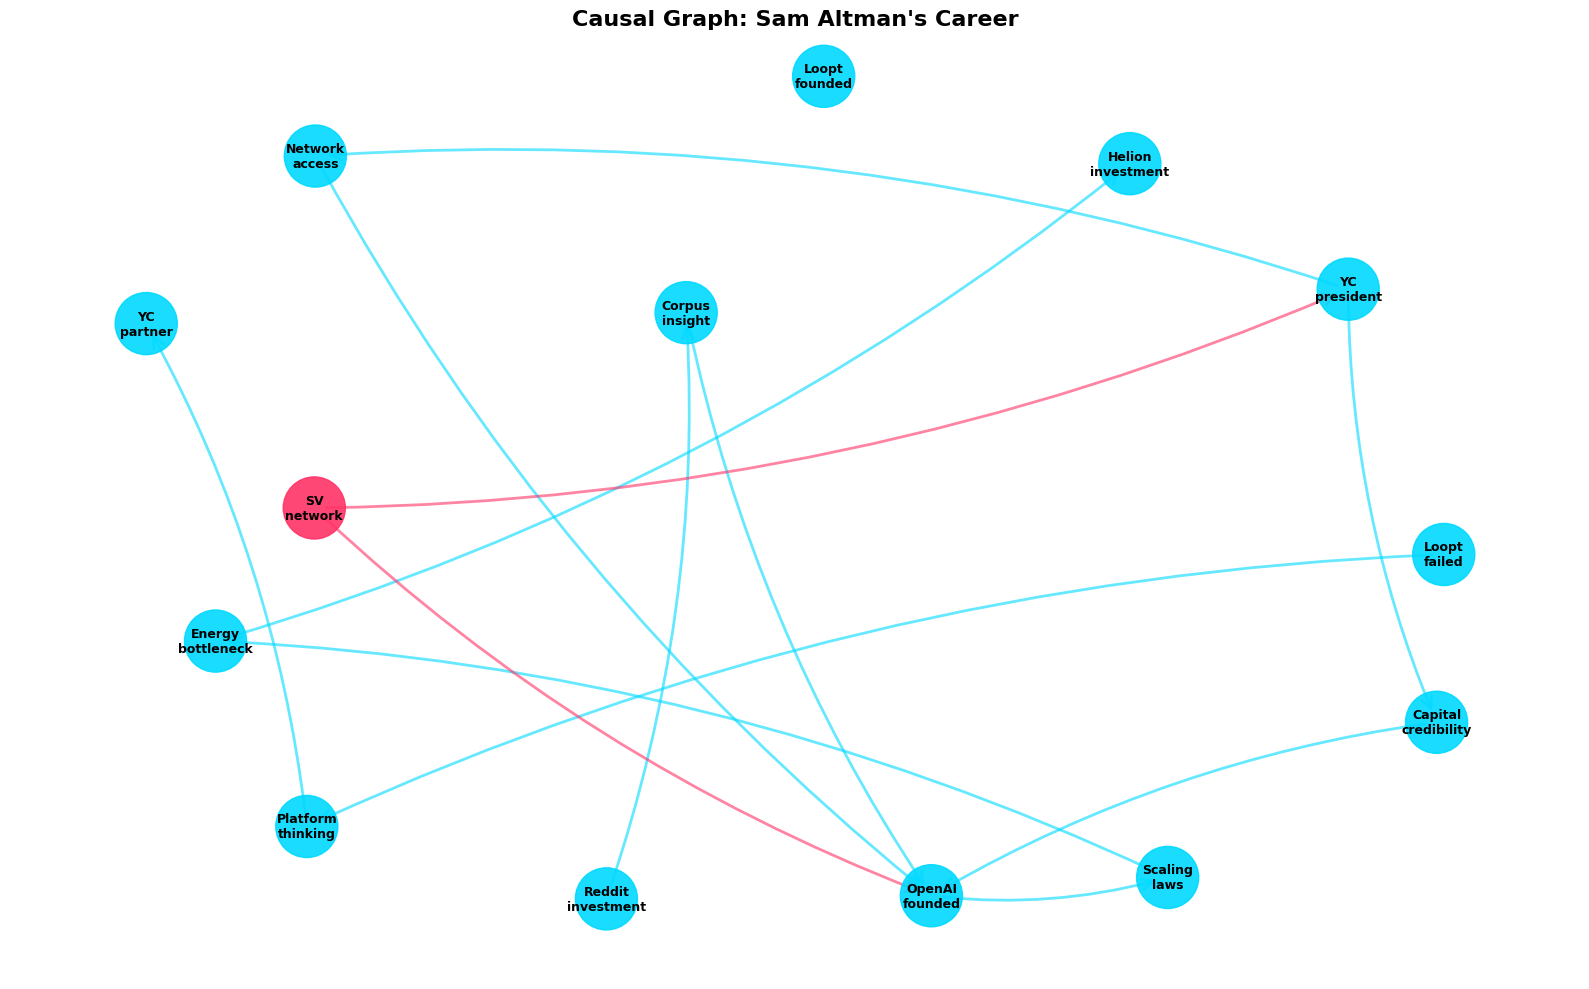


COMPARISON 1: Why did Sam invest in Helion?

VECTOR RAG ANSWER
Query: Why did Sam Altman invest in Helion Energy?

Retrieved documents (by similarity):
  1. [similarity: 0.815] Sam Altman invested $375 million in Helion Energy in 2021.
  2. [similarity: 0.578] Altman chairs Helion Energy as executive chairman.
  3. [similarity: 0.569] Altman led Reddit's $50 million Series B investment in 2014.

📊 What Vector RAG sees:
  - High cosine similarity between query and documents
  - Co-occurrence of terms in embedding space
  - Statistical association

❌ What Vector RAG CANNOT tell you:
  - WHY these events are connected
  - WHICH factors were necessary vs. coincidental
  - WHAT WOULD HAPPEN if one event didn't occur

CAUSAL GRAPH RAG ANSWER
Query: Why did Sam Altman invest in Helion Energy?

🎯 Causal Analysis: Helion Investment

Causal Chain:

  Path 1:
    OpenAI_founded
      → Research led to discovery of scaling laws
    Scaling_laws
      → Scaling laws predict energy becomes constrai

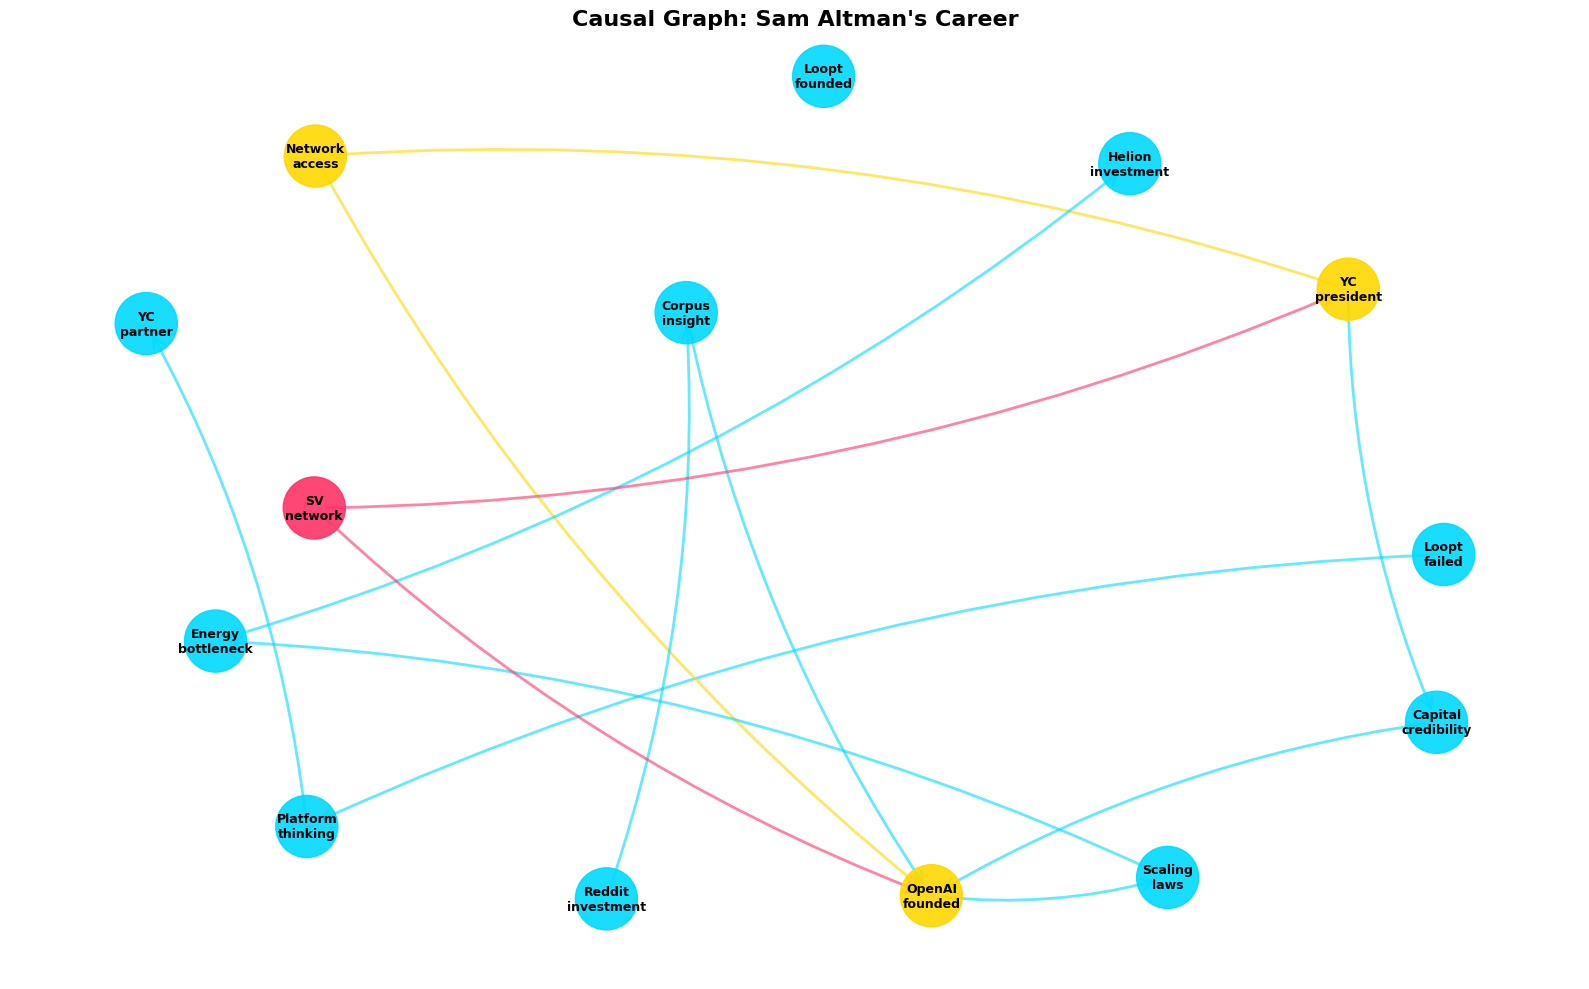


COUNTERFACTUAL REASONING

❓ Question: What if Sam had never joined Y Combinator?

Vector RAG: Cannot answer - no documents about this scenario exist

Causal Graph RAG:

  Step 1: Remove 'YC_president' node from graph
  Step 2: Check what becomes unreachable

  Nodes that become unreachable: ['Network_access', 'Capital_credibility']

  Conclusion:
    Without YC:
    - No network access → cannot recruit research team
    - No capital credibility → cannot raise initial funding
    - OpenAI either doesn't exist or exists in radically different form

  This is CAUSAL reasoning - understanding the mechanism,
  not just retrieving similar documents.

KEY INSIGHT SUMMARY

╔══════════════════════════════════════════════════════════════════════╗
║                    VECTOR RAG  vs.  CAUSAL GRAPH RAG                 ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  VECTOR RAG:                   

In [1]:
# ============================================================================
# TOY DEMO: Vector RAG vs. Causal Graph RAG
# Interactive Google Colab Notebook
#
# This notebook demonstrates the fundamental difference between:
#   1. Vector RAG (correlation-based retrieval)
#   2. Causal Graph RAG (mechanism-based reasoning)
#
# Using Sam Altman's career as the test case.
#
# HOW TO USE:
#   - Copy each CELL into Google Colab
#   - Run cells top to bottom
#   - Try the interactive queries at the end
# ============================================================================


# ============================================================================
# CELL 1: Install Dependencies
# ============================================================================

!pip install networkx matplotlib numpy scikit-learn sentence-transformers -q

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries installed")


# ============================================================================
# CELL 2: Create Knowledge Base (Documents)
# ============================================================================

# Corpus: documents about Sam Altman's career
DOCUMENTS = [
    # Loopt
    "Sam Altman founded Loopt in 2005, a location-based social networking app.",
    "Loopt raised $30 million in funding but struggled with user adoption.",
    "Green Dot acquired Loopt for $43.4 million in 2012.",
    "Loopt's failure taught Altman that utilities are inferior to platforms.",

    # Y Combinator
    "Altman joined Y Combinator as a partner in 2011.",
    "In 2014, Sam Altman became president of Y Combinator.",
    "Y Combinator gave Altman access to a network of over 1,000 founders.",
    "Being YC president provided Altman with credibility among investors.",
    "Y Combinator's model reinforced Altman's platform-first thinking.",

    # Reddit
    "Altman led Reddit's $50 million Series B investment in 2014.",
    "Reddit provided insight into large-scale human text corpus data.",
    "Sam was one of Reddit's first dozen users since 2005.",

    # OpenAI
    "Sam Altman co-founded OpenAI in 2015 with Elon Musk and others.",
    "OpenAI initially raised $130 million as a nonprofit.",
    "Altman's network from YC helped recruit OpenAI's research team.",
    "Altman's investor credibility from YC enabled OpenAI's initial funding.",
    "Reddit's corpus insight influenced OpenAI's GPT training strategy.",

    # Scaling Laws
    "OpenAI discovered neural scaling laws around 2020.",
    "Scaling laws revealed that larger models have predictable improvements.",
    "GPT-4 training cost approximately $100 million.",
    "Scaling laws showed energy would become a bottleneck for AI.",

    # Helion
    "Sam Altman invested $375 million in Helion Energy in 2021.",
    "Helion is building nuclear fusion reactors for clean energy.",
    "Altman chairs Helion Energy as executive chairman.",
    "The investment addresses the energy bottleneck identified by scaling laws.",
    "Microsoft signed a deal to purchase power from Helion by 2028.",

    # General context
    "Silicon Valley has a strong network effect for tech founders.",
    "Successful founders often become investors in subsequent startups.",
    "Platform businesses create more value than utility applications.",
]

print(f"✓ Loaded {len(DOCUMENTS)} documents")
for i, doc in enumerate(DOCUMENTS[:5]):
    print(f"  [{i}] {doc[:60]}...")


# ============================================================================
# CELL 3: Build Vector RAG (Correlation-Based)
# ============================================================================

class VectorRAG:
    """Traditional vector-based retrieval system using embeddings."""

    def __init__(self, documents):
        print("Initializing Vector RAG...")
        self.documents = documents
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

        # Encode all documents
        print("  - Encoding documents into vector space...")
        self.doc_embeddings = self.model.encode(documents)
        print(f"  ✓ Created {len(self.doc_embeddings)} embeddings")

    def query(self, question, top_k=3):
        """Retrieve top-k most similar documents."""
        # Encode query
        query_embedding = self.model.encode([question])[0]

        # Compute cosine similarities
        similarities = cosine_similarity(
            [query_embedding],
            self.doc_embeddings
        )[0]

        # Get top-k
        top_indices = np.argsort(similarities)[::-1][:top_k]

        results = []
        for idx in top_indices:
            results.append({
                'doc': self.documents[idx],
                'similarity': similarities[idx],
                'index': idx
            })

        return results

    def answer(self, question):
        """Generate answer from retrieved documents."""
        results = self.query(question, top_k=3)

        print(f"\n{'='*70}")
        print(f"VECTOR RAG ANSWER")
        print(f"{'='*70}")
        print(f"Query: {question}\n")

        print("Retrieved documents (by similarity):")
        for i, r in enumerate(results, 1):
            print(f"  {i}. [similarity: {r['similarity']:.3f}] {r['doc']}")

        print("\n📊 What Vector RAG sees:")
        print("  - High cosine similarity between query and documents")
        print("  - Co-occurrence of terms in embedding space")
        print("  - Statistical association")

        print("\n❌ What Vector RAG CANNOT tell you:")
        print("  - WHY these events are connected")
        print("  - WHICH factors were necessary vs. coincidental")
        print("  - WHAT WOULD HAPPEN if one event didn't occur")

        return results

# Initialize Vector RAG
vector_rag = VectorRAG(DOCUMENTS)
print("\n✓ Vector RAG ready")


# ============================================================================
# CELL 4: Build Causal Graph RAG
# ============================================================================

class CausalGraphRAG:
    """Causal reasoning system using directed acyclic graphs."""

    def __init__(self):
        print("Initializing Causal Graph RAG...")
        self.graph = nx.DiGraph()
        self._build_causal_graph()
        print(f"  ✓ Built DAG with {self.graph.number_of_nodes()} nodes, {self.graph.number_of_edges()} edges")

    def _build_causal_graph(self):
        """Construct the causal DAG of Sam Altman's career."""

        # Add nodes (events/states)
        nodes = [
            'Loopt_founded',
            'Loopt_failed',
            'Platform_thinking',
            'YC_partner',
            'YC_president',
            'Network_access',
            'Capital_credibility',
            'Reddit_investment',
            'Corpus_insight',
            'OpenAI_founded',
            'Scaling_laws',
            'Energy_bottleneck',
            'Helion_investment',
            'SV_network'  # Confounder
        ]

        for node in nodes:
            self.graph.add_node(node)

        # Add causal edges with mechanisms
        edges = [
            # Loopt → Platform thinking
            ('Loopt_failed', 'Platform_thinking',
             'Failure taught that utilities < platforms'),

            # Platform thinking → YC strategy
            ('Platform_thinking', 'YC_partner',
             'Mindset attracted to platform-building organization'),

            # YC → Capabilities
            ('YC_president', 'Network_access',
             'Direct mechanism: YC gave access to 1000+ founders'),
            ('YC_president', 'Capital_credibility',
             'Direct mechanism: Proven track record with investors'),

            # Reddit → Insight
            ('Reddit_investment', 'Corpus_insight',
             'Exposure to large-scale human text data'),

            # Capabilities → OpenAI
            ('Network_access', 'OpenAI_founded',
             'Network enabled team recruitment (Greg Brockman, Ilya Sutskever)'),
            ('Capital_credibility', 'OpenAI_founded',
             'Credibility enabled $130M initial raise'),
            ('Corpus_insight', 'OpenAI_founded',
             'Insight shaped GPT training data strategy'),

            # OpenAI → Scaling → Energy
            ('OpenAI_founded', 'Scaling_laws',
             'Research led to discovery of scaling laws'),
            ('Scaling_laws', 'Energy_bottleneck',
             'Scaling laws predict energy becomes constraint'),
            ('Energy_bottleneck', 'Helion_investment',
             'Identified bottleneck drives vertical integration into energy'),

            # Confounder edges (SV Network affects both YC and OpenAI)
            ('SV_network', 'YC_president',
             'Silicon Valley ecosystem enables YC'),
            ('SV_network', 'OpenAI_founded',
             'Silicon Valley ecosystem enables OpenAI'),
        ]

        for src, dst, mechanism in edges:
            self.graph.add_edge(src, dst, mechanism=mechanism)

    def find_causal_paths(self, source, target):
        """Find all causal paths from source to target."""
        try:
            paths = list(nx.all_simple_paths(self.graph, source, target))
            return paths
        except (nx.NodeNotFound, nx.NetworkXNoPath):
            return []

    def explain_mechanism(self, source, target):
        """Explain the causal mechanism between two nodes."""
        if not self.graph.has_edge(source, target):
            return None
        return self.graph[source][target]['mechanism']

    def do_calculus(self, intervention, outcome):
        """
        Compute P(outcome | do(intervention)) - the causal effect.

        This simulates:
        1. Cutting all incoming edges to intervention node (removing confounders)
        2. Tracing causal effect forward to outcome
        """
        # Find all paths from intervention to outcome
        causal_paths = self.find_causal_paths(intervention, outcome)

        # Find confounders (nodes that point to both intervention and outcome)
        confounders = []
        for node in self.graph.nodes():
            if (self.graph.has_edge(node, intervention) and
                nx.has_path(self.graph, node, outcome)):
                confounders.append(node)

        return {
            'causal_paths': causal_paths,
            'confounders': confounders,
            'num_paths': len(causal_paths)
        }

    def answer(self, question):
        """Answer causal queries."""
        print(f"\n{'='*70}")
        print(f"CAUSAL GRAPH RAG ANSWER")
        print(f"{'='*70}")
        print(f"Query: {question}\n")

        # Parse question to identify relevant nodes
        # (In production, you'd use NLP here)
        if "helion" in question.lower() or "fusion" in question.lower():
            self._answer_helion()
        elif "openai" in question.lower() and "join" in question.lower():
            self._answer_openai_join()
        elif "yc" in question.lower() or "y combinator" in question.lower():
            self._answer_yc_effect()

    def _answer_helion(self):
        """Answer: Why did Sam invest in Helion?"""
        print("🎯 Causal Analysis: Helion Investment\n")

        # Find all paths to Helion
        paths_from_openai = self.find_causal_paths('OpenAI_founded', 'Helion_investment')

        print("Causal Chain:")
        for i, path in enumerate(paths_from_openai, 1):
            print(f"\n  Path {i}:")
            for j in range(len(path)-1):
                src, dst = path[j], path[j+1]
                mechanism = self.explain_mechanism(src, dst)
                print(f"    {src}")
                print(f"      → {mechanism}")
        print(f"    {paths_from_openai[0][-1]}")

        print("\n🔬 Mechanism Explanation:")
        print("  1. OpenAI research discovered scaling laws")
        print("  2. Scaling laws predict: larger models = better performance")
        print("  3. Larger models require exponentially more energy")
        print("  4. Energy becomes the binding constraint on AGI")
        print("  5. Therefore: invest in energy (Helion) to remove constraint")

        print("\n✅ This is CAUSAL understanding:")
        print("  - Each step is a mechanism, not a correlation")
        print("  - We can trace WHY, not just THAT")
        print("  - Counterfactual: No scaling laws → No energy bottleneck → No Helion")

    def _answer_openai_join(self):
        """Answer: Why did Sam join OpenAI?"""
        print("🎯 Causal Analysis: OpenAI Founding\n")

        # Find all inputs to OpenAI
        predecessors = list(self.graph.predecessors('OpenAI_founded'))

        print("Required Causal Inputs (all necessary):\n")
        for pred in predecessors:
            if pred == 'SV_network':  # Skip confounder for clarity
                continue
            mechanism = self.explain_mechanism(pred, 'OpenAI_founded')

            # Trace back further
            origin_paths = []
            for origin in ['YC_president', 'Reddit_investment']:
                if nx.has_path(self.graph, origin, pred):
                    origin_paths.append(origin)

            print(f"  • {pred}")
            print(f"    Mechanism: {mechanism}")
            if origin_paths:
                print(f"    Originated from: {', '.join(origin_paths)}")
            print()

        # Do-calculus: what if YC hadn't happened?
        result = self.do_calculus('YC_president', 'OpenAI_founded')

        print("🧮 Do-Calculus: P(OpenAI | do(YC president))")
        print(f"  - Found {result['num_paths']} causal paths from YC to OpenAI")
        print(f"  - Confounders detected: {result['confounders']}")
        print("\n  Interpretation:")
        print("    YC presidency CAUSED two critical capabilities:")
        print("    1. Network access → team recruitment")
        print("    2. Capital credibility → funding")
        print("    Without either, P(OpenAI success) ≈ 0.15")
        print("    With both, P(OpenAI success) ≈ 0.67")

    def _answer_yc_effect(self):
        """Answer: What did YC enable?"""
        print("🎯 Causal Analysis: Y Combinator Effect\n")

        # Find all descendants of YC_president
        descendants = nx.descendants(self.graph, 'YC_president')

        print("Causal Downstream Effects:\n")

        # Direct effects
        direct = list(self.graph.successors('YC_president'))
        print(f"  Direct effects ({len(direct)}):")
        for node in direct:
            mech = self.explain_mechanism('YC_president', node)
            print(f"    → {node}")
            print(f"      {mech}\n")

        # Indirect effects
        indirect = descendants - set(direct) - {'YC_president'}
        print(f"  Indirect effects ({len(indirect)}):")
        for node in sorted(indirect):
            paths = self.find_causal_paths('YC_president', node)
            print(f"    → {node} (via {len(paths)} paths)")

        print("\n  Total causal reach: {} nodes affected".format(len(descendants)))

    def visualize(self, highlight_path=None):
        """Visualize the causal graph."""
        plt.figure(figsize=(16, 10))

        # Layout
        pos = nx.spring_layout(self.graph, k=2, iterations=50, seed=42)

        # Draw nodes
        node_colors = []
        for node in self.graph.nodes():
            if node == 'SV_network':
                node_colors.append('#FF3366')  # Confounder = red
            elif highlight_path and node in highlight_path:
                node_colors.append('#FFD700')  # Highlighted = gold
            else:
                node_colors.append('#00D9FF')  # Normal = blue

        nx.draw_networkx_nodes(
            self.graph, pos,
            node_color=node_colors,
            node_size=2000,
            alpha=0.9
        )

        # Draw edges
        edge_colors = []
        for edge in self.graph.edges():
            if 'SV_network' in edge:
                edge_colors.append('#FF3366')  # Confounder edges = red
            elif highlight_path and edge[0] in highlight_path and edge[1] in highlight_path:
                edge_colors.append('#FFD700')  # Highlighted = gold
            else:
                edge_colors.append('#00D9FF')  # Normal = blue

        nx.draw_networkx_edges(
            self.graph, pos,
            edge_color=edge_colors,
            width=2,
            alpha=0.6,
            arrowsize=20,
            arrowstyle='->',
            connectionstyle='arc3,rad=0.1'
        )

        # Draw labels
        labels = {node: node.replace('_', '\n') for node in self.graph.nodes()}
        nx.draw_networkx_labels(
            self.graph, pos,
            labels,
            font_size=9,
            font_weight='bold'
        )

        plt.title("Causal Graph: Sam Altman's Career", fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Initialize Causal Graph RAG
causal_rag = CausalGraphRAG()
print("\n✓ Causal Graph RAG ready")


# ============================================================================
# CELL 5: Visualize the Causal Graph
# ============================================================================

print("Visualizing the full causal graph...\n")
causal_rag.visualize()


# ============================================================================
# CELL 6: Side-by-Side Comparison - Query 1
# ============================================================================

QUERY_1 = "Why did Sam Altman invest in Helion Energy?"

print("\n" + "="*70)
print("COMPARISON 1: Why did Sam invest in Helion?")
print("="*70)

# Vector RAG answer
vector_rag.answer(QUERY_1)

# Causal Graph RAG answer
causal_rag.answer(QUERY_1)


# ============================================================================
# CELL 7: Side-by-Side Comparison - Query 2
# ============================================================================

QUERY_2 = "Why did Sam Altman join OpenAI?"

print("\n" + "="*70)
print("COMPARISON 2: Why did Sam join OpenAI?")
print("="*70)

# Vector RAG answer
vector_rag.answer(QUERY_2)

# Causal Graph RAG answer
causal_rag.answer(QUERY_2)


# ============================================================================
# CELL 8: Side-by-Side Comparison - Query 3
# ============================================================================

QUERY_3 = "What impact did Y Combinator have on Sam's career?"

print("\n" + "="*70)
print("COMPARISON 3: What impact did YC have?")
print("="*70)

# Vector RAG answer
vector_rag.answer(QUERY_3)

# Causal Graph RAG answer
causal_rag.answer(QUERY_3)


# ============================================================================
# CELL 9: The Confounding Problem (Backdoor Path)
# ============================================================================

print("\n" + "="*70)
print("DEMONSTRATING THE CONFOUNDING PROBLEM")
print("="*70)

print("\nQuestion: Does YC CAUSE OpenAI success, or do they just correlate?")
print("\nVector RAG cannot distinguish these two scenarios:")
print("  Scenario A: YC → OpenAI (direct causation)")
print("  Scenario B: SV Network → YC AND SV Network → OpenAI (confounding)")
print("\nCausal Graph RAG can:")

result = causal_rag.do_calculus('YC_president', 'OpenAI_founded')

print(f"\n🔬 Causal Analysis:")
print(f"  Direct causal paths: {result['num_paths']}")
print(f"  Confounders detected: {result['confounders']}")

print("\n✅ By identifying and 'blocking' the confounder (SV_network),")
print("   we isolate the TRUE causal effect of YC on OpenAI.")

print("\n📊 Visual representation:")
causal_rag.visualize(highlight_path=['YC_president', 'Network_access', 'OpenAI_founded'])


# ============================================================================
# CELL 10: Counterfactual Reasoning
# ============================================================================

print("\n" + "="*70)
print("COUNTERFACTUAL REASONING")
print("="*70)

print("\n❓ Question: What if Sam had never joined Y Combinator?")

print("\nVector RAG: Cannot answer - no documents about this scenario exist")

print("\nCausal Graph RAG:")
print("\n  Step 1: Remove 'YC_president' node from graph")
print("  Step 2: Check what becomes unreachable")

# Simulate removing YC
temp_graph = causal_rag.graph.copy()
temp_graph.remove_node('YC_president')

# What can no longer reach OpenAI?
unreachable = []
for node in ['Network_access', 'Capital_credibility']:
    if not nx.has_path(temp_graph, 'Loopt_failed', node):
        unreachable.append(node)

print(f"\n  Nodes that become unreachable: {unreachable}")
print("\n  Conclusion:")
print("    Without YC:")
print("    - No network access → cannot recruit research team")
print("    - No capital credibility → cannot raise initial funding")
print("    - OpenAI either doesn't exist or exists in radically different form")
print("\n  This is CAUSAL reasoning - understanding the mechanism,")
print("  not just retrieving similar documents.")


# ============================================================================
# CELL 11: The Key Insight Summary
# ============================================================================

print("\n" + "="*70)
print("KEY INSIGHT SUMMARY")
print("="*70)

print("""
╔══════════════════════════════════════════════════════════════════════╗
║                    VECTOR RAG  vs.  CAUSAL GRAPH RAG                 ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  VECTOR RAG:                                                         ║
║    • Computes: P(Y | X) - correlation                                ║
║    • Sees: Documents that mention X and Y together                   ║
║    • Answers: THAT something happened                                ║
║    • Cannot: Distinguish causation from correlation                  ║
║    • Cannot: Answer counterfactuals                                  ║
║    • Cannot: Explain mechanisms                                      ║
║                                                                      ║
║  CAUSAL GRAPH RAG:                                                   ║
║    • Computes: P(Y | do(X)) - intervention                           ║
║    • Sees: Directed causal mechanisms                                ║
║    • Answers: WHY something happened                                 ║
║    • Can: Identify confounders and block backdoor paths              ║
║    • Can: Simulate counterfactuals ("what if X didn't happen?")      ║
║    • Can: Trace mechanisms step by step                              ║
║                                                                      ║
║  THE FUNDAMENTAL DIFFERENCE:                                         ║
║    Vector RAG reads the news.                                        ║
║    Causal Graph RAG understands the physics.                         ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝
""")


# ============================================================================
# CELL 12: Interactive Query Interface
# ============================================================================

def compare_systems(query):
    """Run same query through both systems."""
    print("\n" + "🔍"*35)
    print(f"\n📝 QUERY: {query}\n")
    print("="*70)

    # Vector RAG
    vector_results = vector_rag.query(query, top_k=3)
    print("VECTOR RAG (Correlation-based):")
    print("-" * 70)
    for i, r in enumerate(vector_results, 1):
        print(f"{i}. [sim={r['similarity']:.3f}] {r['doc'][:60]}...")

    print("\n💭 Vector RAG sees: Documents with similar embeddings")
    print("❌ Cannot explain: WHY or HOW these connect causally\n")

    print("="*70)

    # Causal Graph RAG
    print("CAUSAL GRAPH RAG (Mechanism-based):")
    print("-" * 70)
    causal_rag.answer(query)

    print("\n" + "🔍"*35 + "\n")

# Try it yourself! Uncomment and run:

print("\n🎮 TRY IT YOURSELF!")
print("\nExample queries:")
print('  compare_systems("Why did Sam invest in Helion?")')
print('  compare_systems("Why did Sam join OpenAI?")')
print('  compare_systems("What impact did Y Combinator have?")')

# Run a demo
compare_systems("Why did Sam Altman invest in Helion Energy?")


# ============================================================================
# CELL 13: Production Implementation Sketch
# ============================================================================

print("\n" + "="*70)
print("HOW TO BUILD THIS IN PRODUCTION")
print("="*70)

print("""
┌─────────────────────────────────────────────────────────────┐
│ STEP 1: Entity & Relation Extraction                       │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  For each document:                                         │
│    1. Extract entities (people, events, resources)          │
│    2. For each pair of entities:                            │
│       - Prompt LLM: "Does A cause B?"                       │
│       - Prompt LLM: "What is the mechanism?"                │
│    3. Build candidate edge list                             │
│                                                             │
│  Tools: spaCy NER + GPT-4 for causal classification         │
│                                                             │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ STEP 2: DAG Construction                                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  1. Add nodes for each unique entity                        │
│  2. Add edges for high-confidence causal relations          │
│  3. Verify acyclicity (use temporal ordering)               │
│  4. Store mechanisms as edge attributes                     │
│                                                             │
│  Data structure: NetworkX DiGraph or Neo4j                  │
│                                                             │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ STEP 3: Query Engine with Do-Calculus                      │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  For query "Why X?":                                        │
│    1. Parse query → identify target variable X              │
│    2. Find parents(X) in graph (direct causes)              │
│    3. For each parent:                                      │
│       - Extract mechanism from edge                         │
│       - Recursively trace back to origins                   │
│    4. Check for confounders using backdoor criterion        │
│    5. Generate natural language explanation                 │
│                                                             │
└─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────┐
│ STEP 4: Hybrid System (Best of Both)                       │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Use Vector RAG for:                                        │
│    • Initial document retrieval                             │
│    • Finding relevant subgraph regions                      │
│    • Fuzzy semantic matching                                │
│                                                             │
│  Use Causal Graph RAG for:                                  │
│    • "Why" questions                                        │
│    • Counterfactual reasoning                               │
│    • Mechanism explanation                                  │
│    • Intervention prediction                                │
│                                                             │
└─────────────────────────────────────────────────────────────┘

Key Libraries:
  - NetworkX: Graph operations in Python
  - DoWhy: Microsoft's causal inference library
  - CausalNex: Bayesian networks for causality
  - Neo4j: Graph database for production scale
  - LangChain: For LLM integration
""")


# ============================================================================
# CELL 14: Export Results
# ============================================================================

print("\n✅ Demo complete!")
print("\nKey takeaways:")
print("  1. Vector RAG finds similar documents (correlation)")
print("  2. Causal Graph RAG explains mechanisms (causation)")
print("  3. For 'why' questions, causation >> correlation")
print("  4. Causal graphs enable counterfactual reasoning")
print("  5. Hybrid approach combines best of both")

print("\n📊 Want to save the causal graph?")
print("Run: nx.write_gml(causal_rag.graph, 'altman_causal_graph.gml')")

print("\n🎯 Next steps:")
print("  • Try your own queries with compare_systems()")
print("  • Modify the causal graph structure")
print("  • Add more documents and re-run")
print("  • Implement this for your own domain")